<a href="https://colab.research.google.com/github/Palak730/EDA-hotelbookingcancellation/blob/main/Hotelbookiganalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Palak Srivastava



# **Problem Statement -**

In this workspace, we will build a machine learning model to predict whether or not a customer cancelled a hotel booking.

We will use a dataset on hotel bookings from the article "Hotel booking demand datasets", published in the Elsevier journal, Data in Brief. The abstract of the article states

This data article describes two datasets with hotel demand data. One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 31 variables describing the 40,060 observations of H1 and 79,330 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of march of 2015 and the 31st of March 2017, including bookings that effectively arrived and bookings that were canceled.







# **GitHub Link -**

Provide your GitHub Link here.

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/'
data=pd.read_csv(file_path + '/Hotel Bookings.csv')

### Dataset First View

In [5]:
# Dataset First Look
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
data.shape

(119390, 32)

### Dataset Information

In [7]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### What did you know about your dataset?

To understand the meaning of all columns in the dataframe, we will examine the unique values for each column whose definition is unclear. This approach will help us gain insights into the data and identify any patterns or outliers. By carefully examining the unique values for each column, we can gain a better understanding of the data and make informed decisions about how to analyze it.

### Variables Description 

**The columns of the dataframe and the data they represent are listed below:**

**hotel** : Name of the hotel namely - Resort Hotel and City Hotel

**is_canceled** : If the booking was canceled (1) or not (0)

**lead_time** : Number of days before the actual arrival of the guests

**arrival_date_year** : Year of arrival date

**arrival_date_month** : Month of arrival date

**arrival_date_week_numbe**r : Week number of the year for arrival date

**arrival_date_day_of_month** : Day of arrival date

**stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

**stays_in_week_nights **: Number of weeknights (Monday to Friday) spent at the hotel by the guests.

**adults** : Number of adults among the guests

**children** : Number of children accompanying the adults

**babies** : Number of babies accompanying the adults

**meal** : Type of meal booked

**country** : Country of origin of the guests

**market_segment** : Designation of market segment

**distribution_channel** : Name of booking distribution channel

**is_repeated_guest** : If the booking was from a repeated guest (1) or not (0)

**previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking

**previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type** : Code of room type reserved

**assigned_room_type** : Code of room type assigned

**booking_changes** : Number of changes made to the booking

**deposit_type** : Type of the deposit made by the guest

**agent** : ID of travel agent who made the booking

**company** : ID of the company that made the booking

**days_in_waiting_list** : Number of days the booking was in the waiting list

**customer_type** : Type of customer, assuming one of four categories

**adr** : Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking_spaces** : Number of car parking spaces required by the customer

**total_of_special_requests** : Number of special requests made by the customer

**reservation_status** : Reservation status (Cancelled, Check-Out or No-Show)

**reservation_status_date** : Date at which the last reservation status was updated

It can be observed from the unique values of columns namely "adults", "children" and "babies" that there are entries with value = 0. If the number of adults = 0, then we need to remove those rows as "children" and "babies" can't book a hotel without being accompanied by an adult.

## ***2. Understanding Your Variables***

### Check Unique Values for each variable.

In [11]:
data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [12]:
data['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [13]:
data['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [14]:
data['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [15]:
data['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [16]:
data['deposit_type'].value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [17]:
data['customer_type'].value_counts()

Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64

In [18]:
data['total_of_special_requests'].value_counts()

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

<Axes: xlabel='hotel', ylabel='count'>

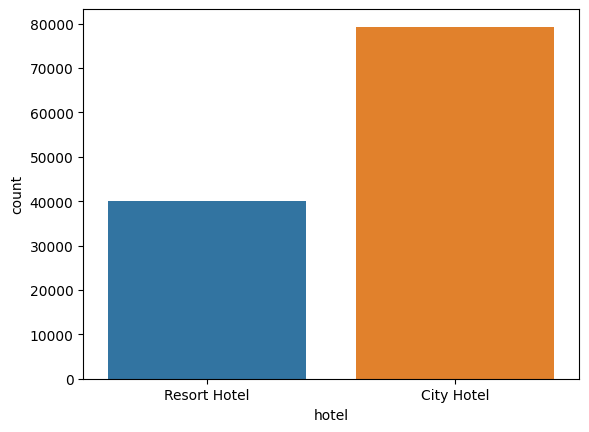

In [19]:
sns.countplot(data=data, x= 'hotel')

<Axes: xlabel='is_canceled', ylabel='count'>

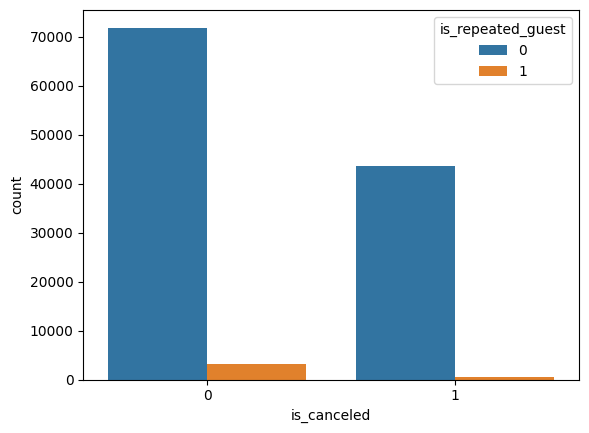

In [20]:
sns.countplot(data=data, x= 'is_canceled',hue= 'is_repeated_guest')

<Axes: xlabel='hotel', ylabel='count'>

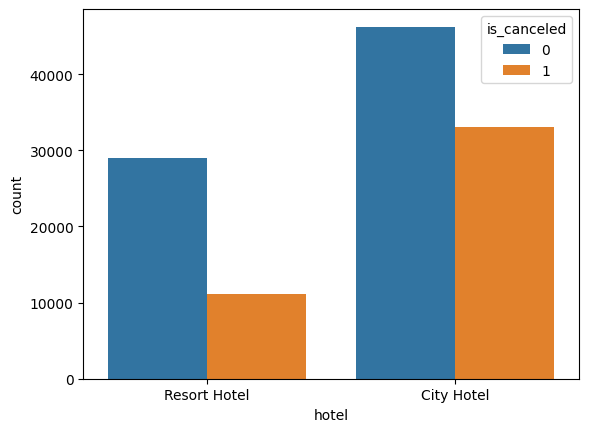

In [21]:
sns.countplot(data=data, x= 'hotel', hue= 'is_canceled')

**Cleaning data is the process of identifying and correcting or removing inaccurate, incomplete, or irrelevant data from a dataset. It involves removing duplicate rows, handling missing values, converting columns to appropriate data types, and adding important columns**

#### Step 1 
Duplicate Values

In [22]:
data = data.drop_duplicates()


#### Step 2 

Missing Values/Null Values

In [23]:
# Missing Values/Null Values Count
data.isnull().sum().sort_values(ascending = False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [24]:
#Replace all the null value with 0
data.fillna(0, inplace = True)

In [25]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

#### Step 3 
Converting columns to appropriate data types

In [26]:
Subset = data[(data['children']== 0) & (data['adults']==0)& (data['babies']==0)]

In [27]:
Subset[['children','adults','babies']]

,children,adults,babies
2224,0.0,0,0
2409,0.0,0,0
3181,0.0,0,0
3684,0.0,0,0
3708,0.0,0,0
...,...,...,...
115029,0.0,0,0
115091,0.0,0,0
116251,0.0,0,0
116534,0.0,0,0


In [28]:
Delete= (data['children']== 0) & (data['adults']==0)& (data['babies']==0)

In [29]:
df = data[~Delete]

#### Step 4
Adding important columns

In [30]:
# meal contain value Undefined which is equal to SC
data['meal'].replace("Undefined", "SC", inplace = True)

In [31]:
data['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [32]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [33]:
df.shape

(87230, 32)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                           

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

1.Which country has the highest number of guests? Visualize it using a bar graph showing the number of guests from each country.

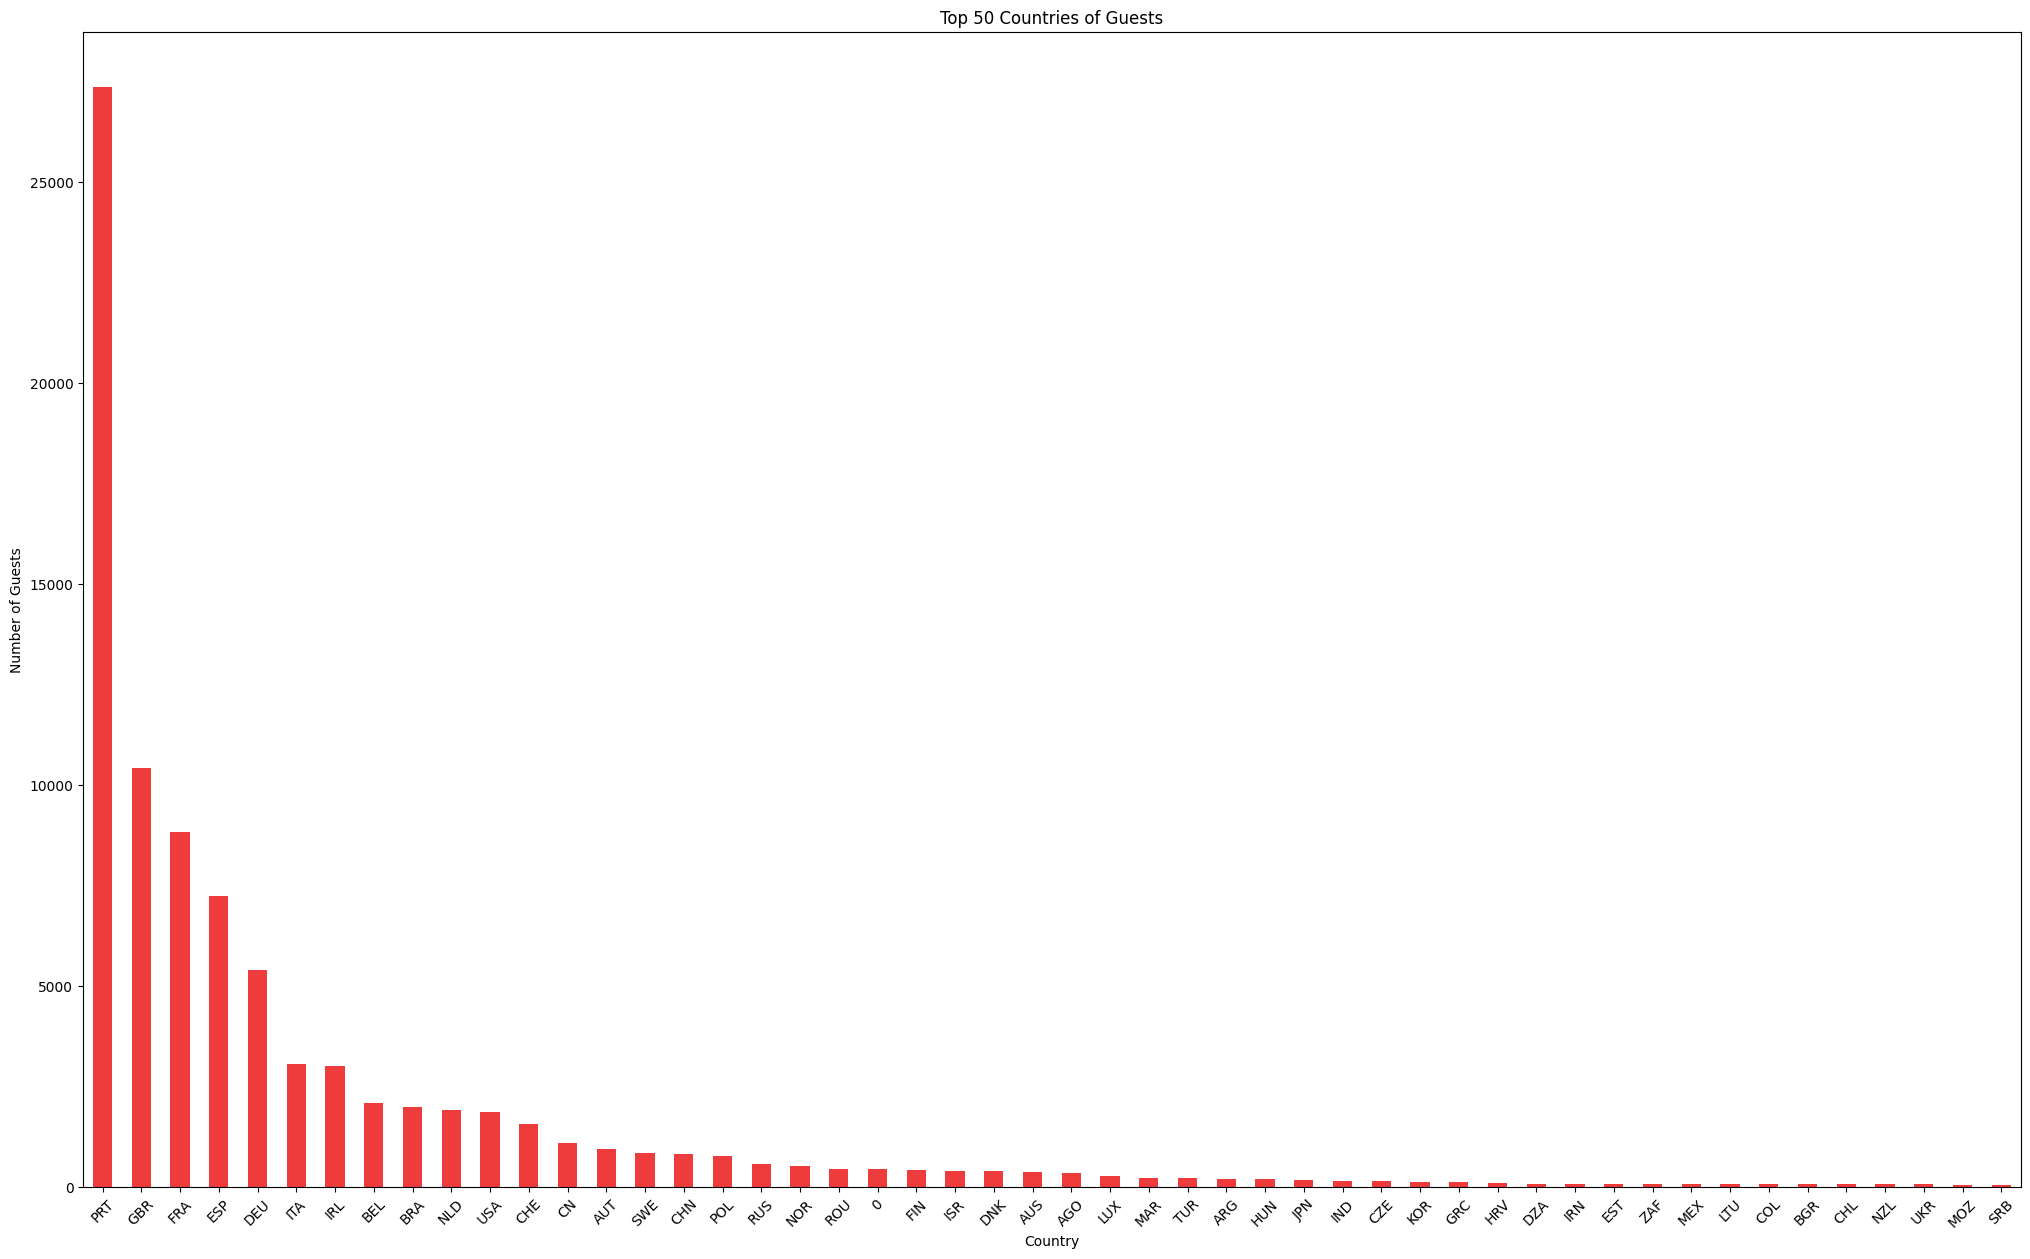

In [35]:
country_guests = df['country'].value_counts().head(50)
colors = ['#EE3B3B']
plt.figure(figsize=(25,15))

country_guests.plot(kind='bar' ,color=colors)
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.title('Top 50 Countries of Guests')
plt.xticks(rotation=45)
plt.show()

**The resulting bar graph will display the number of guests from each country, with the x-axis representing the countries and the y-axis representing the number of guests. From the graph, it can be observed that Portugal has the highest number of bookings compared to other countries.**


2.What is the distribution of bookings based on the number of special requests made by guests? Visualize it using a bar chart.

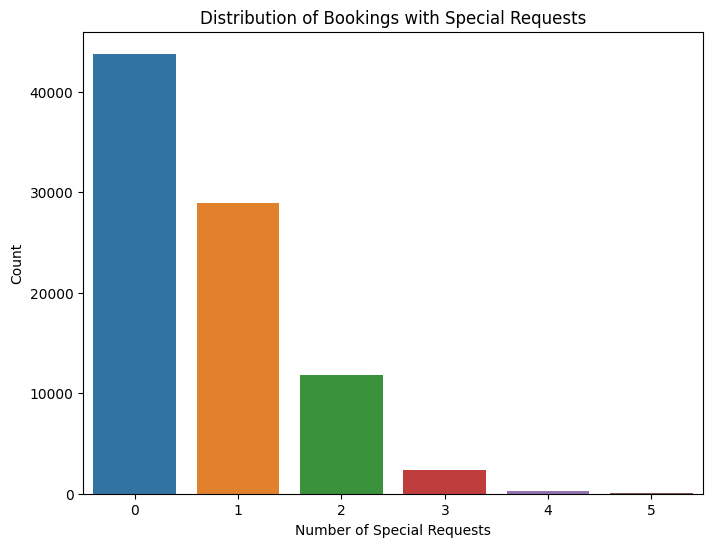

In [36]:
special_requests_count = data['total_of_special_requests'].value_counts()

# Create a bar chart or countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='total_of_special_requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.title('Distribution of Bookings with Special Requests')
plt.show()

**The distribution of bookings reveals that the majority have zero special requests, indicating a lack of additional requirements from most guests. However, a considerable number of bookings show one or two special requests, highlighting the importance of catering to specific guest preferences and providing personalized services.**

3. What is the percentage distribution of bookings across different years?

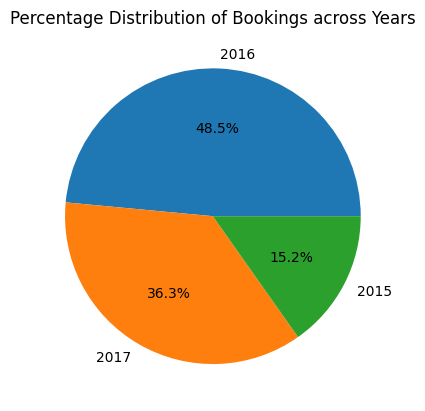

In [37]:
year_counts = df['arrival_date_year'].value_counts()
# Calculate the percentage distribution
percentage_distribution = (year_counts / year_counts.sum()) * 100
# Create a pie chart
plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Bookings across Years')
# Display the chart
plt.show()

**The year 2016 recorded the highest number of bookings, while 2015 and 2017 had the lowest. On average, these three years exhibited a steady booking pattern, with 2016 being the most popular year.**

4. Which month experiences the highest level of hotel bookings? Visualize it using a line graph to determine the busiest month for hotels.

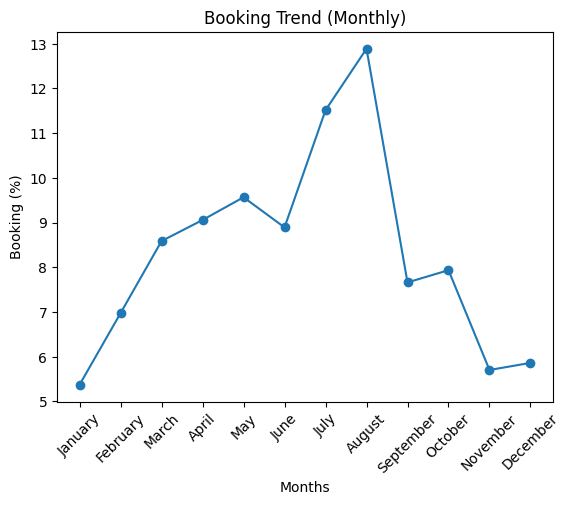

In [38]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']
sorted_months = df['arrival_date_month'].value_counts().reindex(new_order)
x = sorted_months.index
y = (sorted_months / sorted_months.sum()) * 100

plt.plot(x, y, marker='o')
plt.xlabel('Months')
plt.ylabel('Booking (%)')
plt.title('Booking Trend (Monthly)')
plt.xticks(rotation=45)
plt.show()

**August stands out as the busiest month for hotel bookings, reflecting high travel and accommodation demand. Hoteliers should prepare accordingly to cater to the influx of guests and ensure smooth operations during this peak period.**

#### Bivariate Analysis

5. How does the cancellation rate differ between city hotels and resort hotels? Analyze and compare the booking cancellation rates for each hotel type to understand the variations in cancellation behavior.


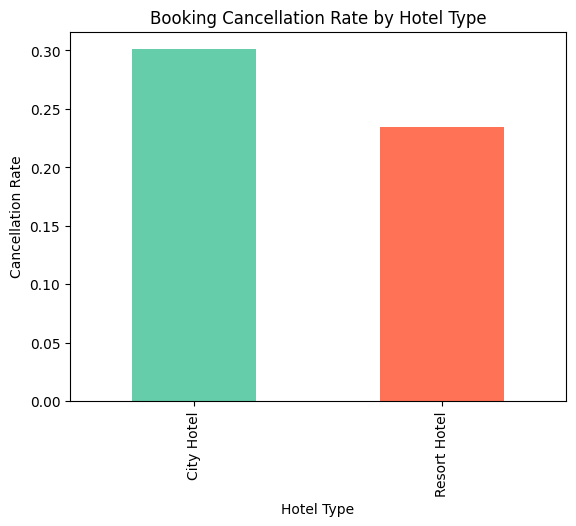

In [39]:
cancel_rates = df.groupby('hotel')['is_canceled'].mean()
colors = ['#66CDAA', '#FF7256']
cancel_rates.plot(kind='bar', color = colors)
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.title('Booking Cancellation Rate by Hotel Type')
plt.show()

**City hotels experience a higher cancellation rate compared to resort hotels, suggesting potential differences in booking behaviors and cancellation policies between the two types of accommodations. This insight highlights the need for tailored strategies to manage cancellations effectively in city hotel settings.**

6. How do the average daily rates (ADR) compare between city hotels and resort hotels? Visualize the ADR for each hotel type using a bar chart to identify any differences in pricing between urban and leisure destinations.

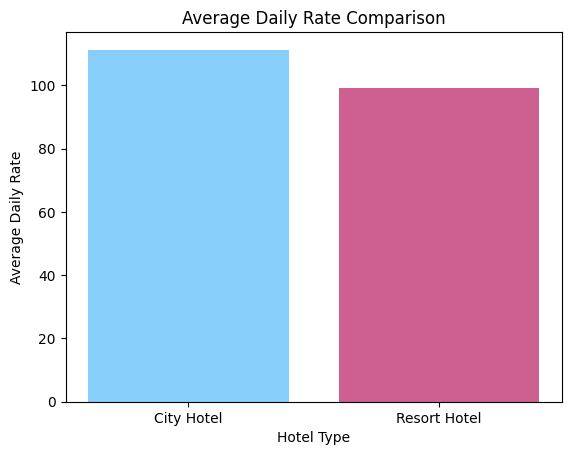

In [40]:

# Group data by hotel type and calculate the average daily rate
avg_daily_rate = df.groupby('hotel')['adr'].mean()
colors = ['#87CEFA','#CD6090']
# Plot the average daily rate by hotel type
plt.bar(avg_daily_rate.index, avg_daily_rate , color = colors)
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate')
plt.title('Average Daily Rate Comparison')
plt.show()

**City hotels command higher average daily rates (ADR) than resort hotels, indicating potential variations in pricing strategies and market dynamics between urban and leisure destinations.**

7. How does the lead time for bookings differ between city hotels and resort hotels? Analyze and compare the distribution of lead time using box plots for each hotel type to understand variations in the time gap between booking and arrival.

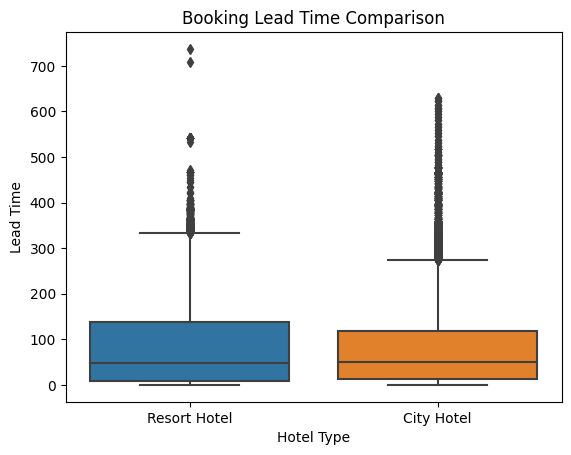

In [41]:
sns.boxplot(x='hotel', y='lead_time', data=df)
plt.xlabel('Hotel Type')
plt.ylabel('Lead Time')
plt.title('Booking Lead Time Comparison')
plt.show()

**City hotels exhibit a higher booking lead time compared to resort hotels, indicating a longer duration between booking and arrival. This finding emphasizes the importance of understanding and accommodating the planning preferences of guests in urban destinations.**

8. How does the length of stay vary between city hotels and resort hotels? Analyze and compare the distribution of stay durations using countplot for each hotel type to understand differences in the length of guest stays in urban and leisure destinations.


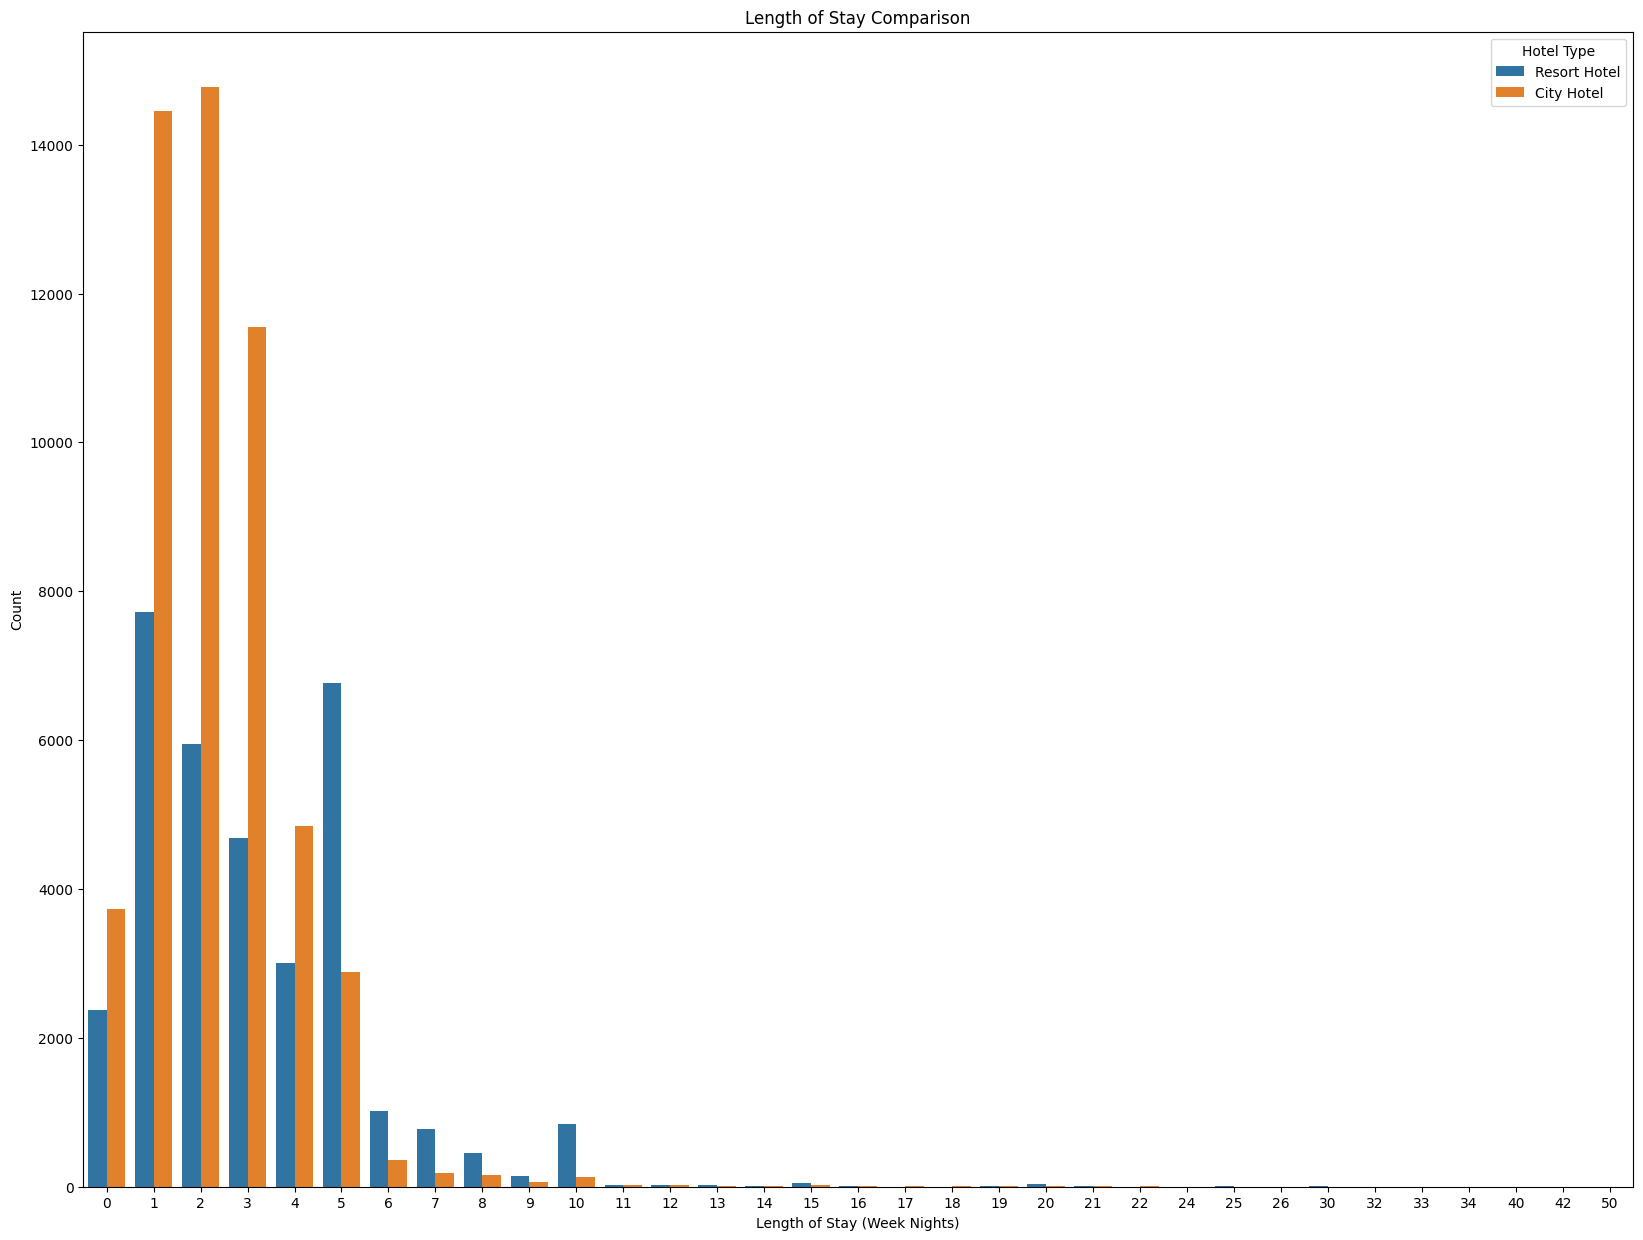

In [42]:
# Create count plots of length of stay by hotel type
plt.figure(figsize=(20,15))
sns.countplot(data=df, x='stays_in_week_nights', hue='hotel')
plt.xlabel('Length of Stay (Week Nights)')
plt.ylabel('Count')
plt.title('Length of Stay Comparison')
plt.legend(title='Hotel Type')
plt.show()


**In city hotels, the highest number of stays is observed for a length of stay of 1 or 2 days, indicating that guests often opt for shorter stays in these hotels. On the other hand, resort hotels tend to have a lower number of stays, suggesting that guests may choose to stay for longer durations in these leisure-oriented establishments.**

9. How does the distribution of market segments differ between city hotels and resort hotels?


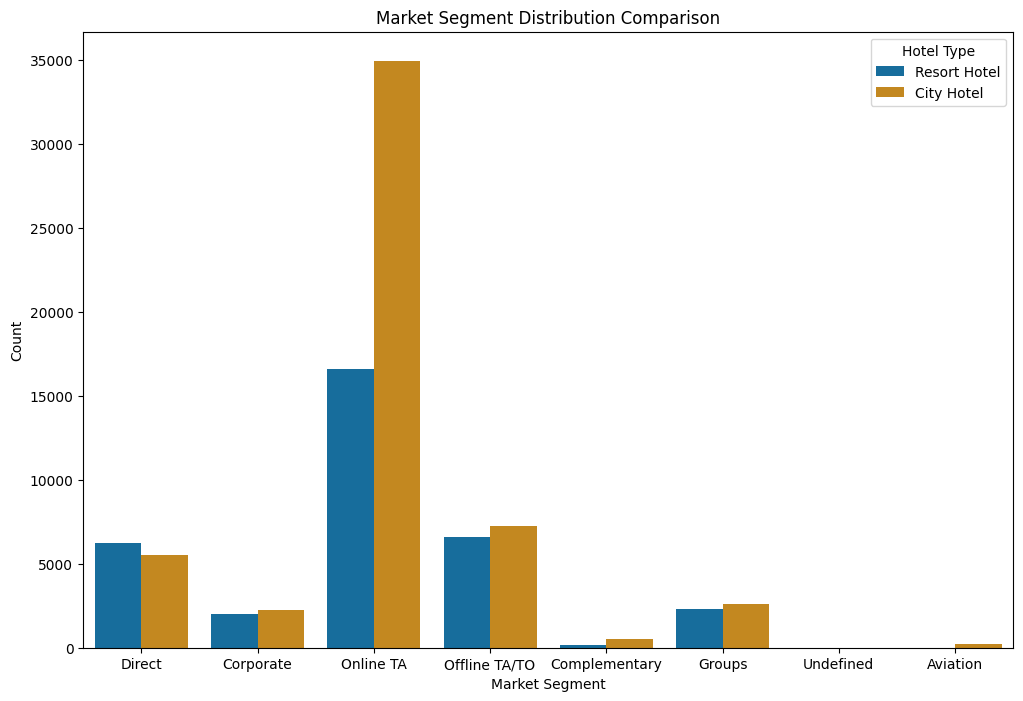

In [43]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='market_segment', hue='hotel', palette='colorblind')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.title('Market Segment Distribution Comparison')
plt.legend(title='Hotel Type')
plt.show()

**City hotels have a higher count of market segment "Online TA" compared to resort hotels, indicating a higher preference for online travel agencies in city hotels.**

10. What is the distribution of customer types in city hotels compared to resort hotels?

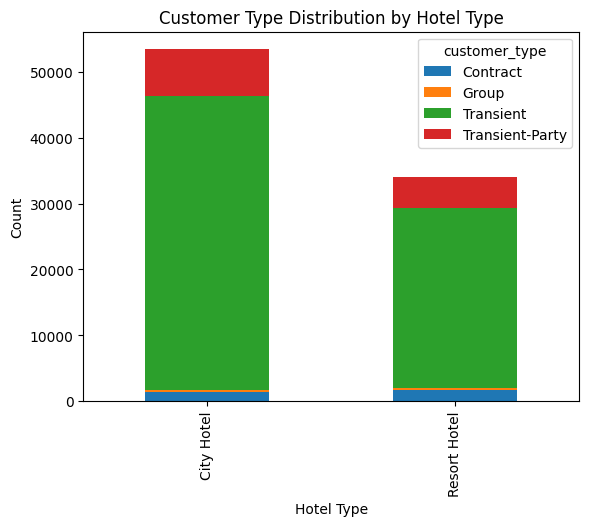

In [44]:
customer_counts = data.groupby(['hotel', 'customer_type']).size().unstack()
customer_counts.plot(kind='bar', stacked=True)
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.title('Customer Type Distribution by Hotel Type')
plt.show()

**City hotels have a higher count of transient customers compared to resort hotels, indicating a preference for short-term stays. This suggests that city hotels cater more to business travelers and tourists with shorter durations of stay.**

11. Which meal type is more common in city hotels compared to resort hotels?

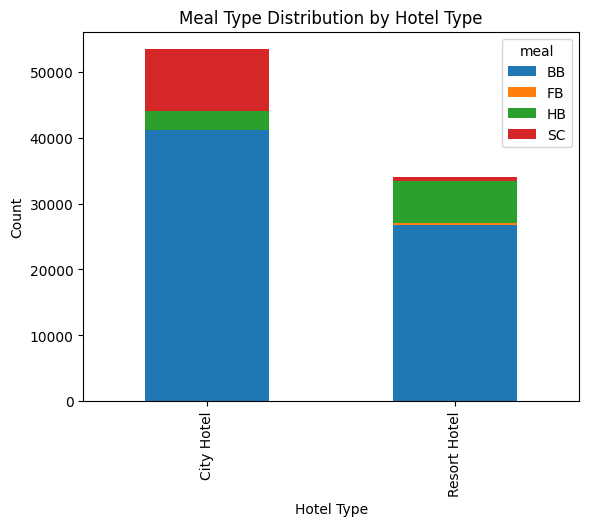

In [45]:
meal_counts = data.groupby(['hotel', 'meal']).size().unstack()
meal_counts.plot(kind='bar', stacked=True)
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.title('Meal Type Distribution by Hotel Type')
plt.show()


**The distribution of meal types shows that "BB" / "Bead and Breakfast" is more common in city hotels compared to resort hotels, indicating a preference for this meal option among guests staying in city hotels.**

#### Correlationship Analysis

This visualization will help you understand the relationships and dependencies between the numerical variables in your dataset. The colors in the heat map indicate the strength and direction of the correlations. Positive correlations are shown in warmer colors, while negative correlations are shown in cooler colors.

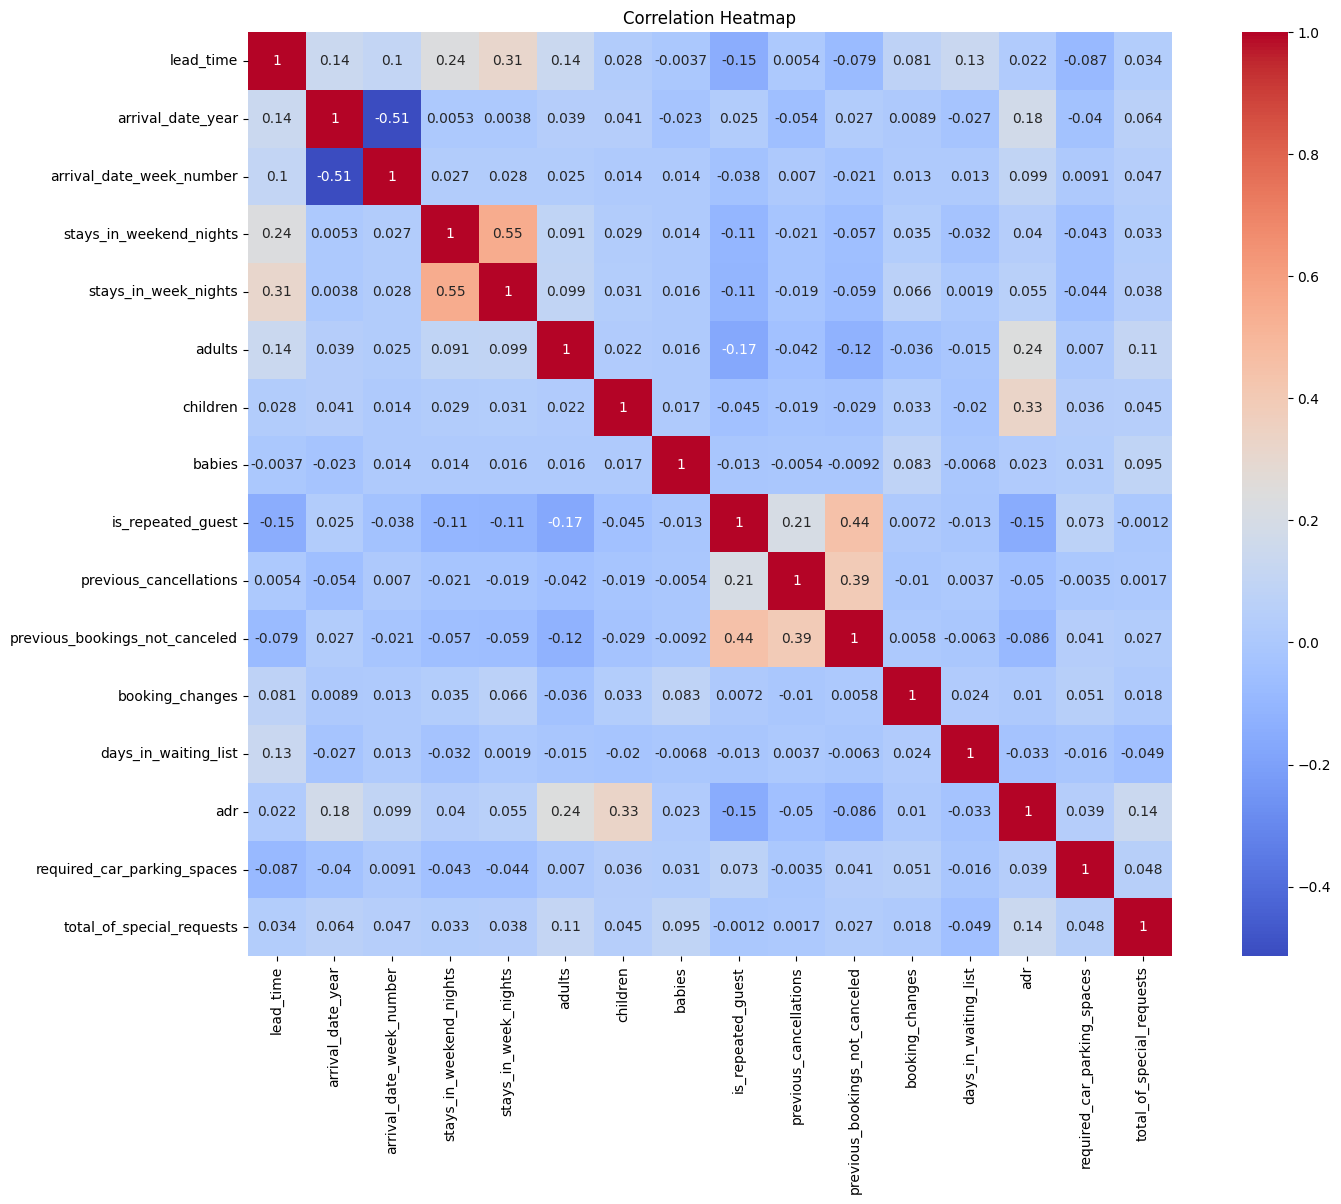

In [46]:
# Select the numerical columns for correlation analysis
numerical_columns = ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'stays_in_weekend_nights',
                     'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
                     'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                     'total_of_special_requests']

# Calculate the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Generate a correlation heat map
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


The correlation analysis reveals the degree of association between various numerical variables in the dataset. It helps identify patterns and dependencies among the variables. Based on the heatmap, variables with stronger positive correlations are likely to move in the same direction, while variables with stronger negative correlations tend to move in opposite directions. This information can be valuable in understanding the relationships and making informed decisions or predictions based on the dataset.







# **Conclusion**

1. Portugal stands out as the country with the highest number of bookings, surpassing all other countries in the dataset.
2. Most bookings indicate no special requests, but a notable proportion includes one or two special requests, emphasizing the importance of catering to individual guest preferences.
3. The year 2016 witnessed the highest number of bookings, while 2015 and 2017 had the lowest, resulting in a stable average booking trend.
4. August emerges as the busiest month for hotel bookings, necessitating careful planning and resource management.
5. Cancellation rates are higher in city hotels than in resort hotels, indicating a disparity in booking cancellation behavior.
6. City hotels have higher average daily rates (ADR) than resort hotels, indicating potential differences in pricing and market positioning.
7. City hotels have a higher booking lead time compared to resort hotels, suggesting potential differences in the timing of reservations between the two types of accommodations.
8. City hotels show a higher frequency of stays for 1 or 2 days, while resort hotels have fewer stays overall.
9. The count of market segments "Online TA" is higher in city hotels compared to resort hotels.
10. City hotels have a higher count of transient customer type compared to resort hotels, indicating a larger preference for short-term stays in city accommodations.
11. "BB/ Bead and Breakfast" is the predominant meal type in city hotels, surpassing its occurrence in resort hotels.




### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***